In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csvdf = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\DBA5106 - Foundations in BA\group-assignment\tomato-2011-2020.csv')
print(df.shape)
df.head(3)

(59498, 8)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Greg Maki,False,"Star-Democrat (Easton, MD)",Rotten,D+,2011/11/5,The premise of Percy Jackson & the Olympians: ...
1,m/0878835,Candice Frederick,False,Reel Talk Online,Fresh,A-,2017/9/11,"Funny at times, Please Give is a surprisingly ..."
2,m/1000013-12_angry_men,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B,2011/5/12,"Lumet keeps things tense, sweaty, suspenseful ..."


In [3]:
score = []

for row in df['review_score']:
    if row == 'A':
        score.append(12)
    elif row == 'A-':
        score.append(11)
    elif row == 'B+':
        score.append(10)
    elif row == 'B':
        score.append(9)
    elif row == 'B-':
        score.append(8)
    elif row == 'C+':
        score.append(7)
    elif row == 'C':
        score.append(6)
    elif row == 'C-':
        score.append(5)
    elif row == 'D+':
        score.append(4)
    elif row == 'D':
        score.append(3)
    elif row == 'D-':
        score.append(2)
    elif row == 'F':
        score.append(1)    
    else:
        score.append(0)

df['score'] = score
display(df.head())

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,score
0,m/0814255,Greg Maki,False,"Star-Democrat (Easton, MD)",Rotten,D+,2011/11/5,The premise of Percy Jackson & the Olympians: ...,4
1,m/0878835,Candice Frederick,False,Reel Talk Online,Fresh,A-,2017/9/11,"Funny at times, Please Give is a surprisingly ...",11
2,m/1000013-12_angry_men,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B,2011/5/12,"Lumet keeps things tense, sweaty, suspenseful ...",9
3,m/1000013-12_angry_men,Chris Stuckmann,False,ChrisStuckmann.com,Fresh,A,2018/1/26,This movie is a masterpiece. That term gets th...,12
4,m/1000079-20000_leagues_under_the_sea,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2012/5/31,A good one that could have been better with a ...,10


In [4]:
# review_type:Fresh好評轉換成數字1, Rotten壞評轉換成0
df['sentiment'] = np.where(df['review_type'] == 'Fresh', 1, 0)
df.head(3)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,score,sentiment
0,m/0814255,Greg Maki,False,"Star-Democrat (Easton, MD)",Rotten,D+,2011/11/5,The premise of Percy Jackson & the Olympians: ...,4,0
1,m/0878835,Candice Frederick,False,Reel Talk Online,Fresh,A-,2017/9/11,"Funny at times, Please Give is a surprisingly ...",11,1
2,m/1000013-12_angry_men,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B,2011/5/12,"Lumet keeps things tense, sweaty, suspenseful ...",9,1


In [5]:
review_df = df[['review_content','sentiment']]
review_df.head()

,review_content,sentiment
0,The premise of Percy Jackson & the Olympians: ...,0
1,"Funny at times, Please Give is a surprisingly ...",1
2,"Lumet keeps things tense, sweaty, suspenseful ...",1
3,This movie is a masterpiece. That term gets th...,1
4,A good one that could have been better with a ...,1


In [6]:
review_df['sentiment'].value_counts()

1    38922
0    20576
Name: sentiment, dtype: int64

In [7]:
#split the dataset  
#train dataset
training_reviews = review_df.review_content[:42000]
training_sentiment = review_df.sentiment[:42000]
#test dataset
testing_reviews = review_df.review_content[42000:]
testing_sentiment = review_df.sentiment[42000:]

print(training_reviews.shape, training_sentiment.shape)
print(testing_reviews.shape, testing_sentiment.shape)

(42000,) (42000,)
(17498,) (17498,)


In [8]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Joyce
[nltk_data]     Huang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
review_df['review_content'] = review_df['review_content'].apply(denoise_text)

In [11]:
#Define function for removing special characters
# def remove_special_characters(text, remove_digits=True):
#     pattern=r'[^a-zA-z0-9\s]'
#     text=re.sub(pattern,'',text)
#     return text
#Apply function on review column
# review_df['review_content']=review_df['review_content'].apply(remove_special_characters)

In [12]:
#Stemming the text
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text
#Apply function on review column
# review_df['review_content']=review_df['review_content'].apply(simple_stemmer)

In [13]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

{'her', 'through', 'until', "mightn't", 'no', 'each', 'do', 'me', "she's", 'had', 'only', 'about', 'an', 'here', 'don', 'it', 'themselves', 'couldn', 'have', 'more', 'out', 'being', "isn't", 'myself', 'from', "didn't", 'theirs', 'having', 'your', 'been', 'so', 'himself', 'him', 'into', 'they', 'in', 'won', 'once', 'there', "weren't", 't', 'be', 'above', 'other', 'wasn', 'hadn', 'the', 'that', 'of', 'mightn', "won't", 'should', "you'll", 'yours', 'haven', 'is', 'whom', 'did', 'while', 'any', 'over', 'during', 'or', 'shouldn', 'she', 'with', 'both', "you've", 'now', 'aren', 'am', 'between', 'ma', 'his', 'own', "doesn't", 'y', 'are', 'below', 'down', 'again', 'shan', 'ourselves', 'after', 'wouldn', 'he', "wouldn't", 'ain', 'has', 'off', 'very', "you'd", 'a', 'hers', 'same', "you're", 'their', 'which', 'we', "wasn't", 'my', 'few', 'all', "haven't", 'for', 'does', 'where', 'd', 'isn', "needn't", 'm', "shouldn't", "aren't", 'mustn', 'weren', 'then', 'some', 'will', "it's", 'who', 'against', 

In [14]:
#normalized train reviews
norm_train_reviews=review_df.review_content[:42000]
norm_train_reviews[0]


'The premise of Percy Jackson & the Olympians: The Lightning Thief holds great potential potential the film never realizes.'

In [15]:
#Normalized test reviews
norm_test_reviews=review_df.review_content[42000:]
norm_test_reviews[45005]

'The Force Awakens is meant to honour the past and lead us into a new narrative future. It feels like what people feel a Star Wars film is supposed to feel like. The Force is strong with this one.'

In [16]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (42000, 784448)
BOW_cv_test: (17498, 784448)


In [17]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (42000, 784448)
Tfidf_test: (17498, 784448)


In [18]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(review_df['sentiment'])
print(sentiment_data.shape)

(59498, 1)


In [19]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:42000]
test_sentiments=sentiment_data[42000:]
print(train_sentiments)
print(test_sentiments)

[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


In [71]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score, 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [75]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_bow = knn.fit(cv_train_reviews,train_sentiments)
print(knn_bow)
knn_tfidf = knn.fit(tv_train_reviews,train_sentiments)
print(knn_tfidf)

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=3)


In [76]:
#Predicting the model for bag of words
knn_bow_predict=knn.predict(cv_test_reviews)
print(knn_bow_predict)
##Predicting the model for tfidf features
knn_tfidf_predict=knn.predict(tv_test_reviews)
print(knn_tfidf_predict)

#Training y_pred
#Predicting the model for bag of words
knn_bow_predict_train=knn.predict(cv_train_reviews)
print(knn_bow_predict_train)
#Predicting the model for tfidf features
knn_tfidf_predict_train=knn.predict(tv_train_reviews)
print(knn_tfidf_predict_train)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [77]:
#Accuracy score for bag of words
knn_bow_score=accuracy_score(test_sentiments,knn_bow_predict)
print("knn_bow_score :",knn_bow_score)
#Accuracy score for tfidf features
knn_tfidf_score=accuracy_score(test_sentiments,knn_tfidf_predict)
print("knn_tfidf_score :",knn_tfidf_score)

#Training Accuracy score
#Accuracy score for bag of words
knn_bow_score_train=accuracy_score(train_sentiments,knn_bow_predict_train)
print("knn_bow_score :",knn_bow_score_train)
#Accuracy score for tfidf features
knn_tfidf_score_train=accuracy_score(train_sentiments,knn_tfidf_predict_train)
print("knn_tfidf_score :",knn_tfidf_score_train)

knn_bow_score : 0.646073837009944
knn_tfidf_score : 0.6457880900674363
knn_bow_score : 0.6576666666666666
knn_tfidf_score : 0.6576666666666666


In [78]:
auc_bow = roc_auc_score(test_sentiments,knn_bow_predict)
print('auc_bow = ',auc_bow)

auc_tfidf = roc_auc_score(test_sentiments,knn_tfidf_predict)
print('auc_tfidf = ',auc_tfidf)

auc_bow =  0.5005490495078344
auc_tfidf =  0.5


[[    9  6189]
 [    4 11296]]
[[    0  6198]
 [    0 11300]]


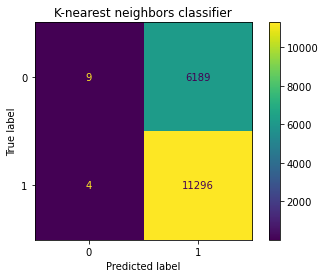

In [83]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,knn_bow_predict,labels=[0,1])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,knn_tfidf_predict,labels=[0,1])
print(cm_tfidf)


disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_bow)
disp_knn.plot()
plt.title('K-nearest neighbors classifier')
plt.show()

In [45]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [47]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

#Training y_pred
#Predicting the model for bag of words
lr_bow_predict_train=lr.predict(cv_train_reviews)
print(lr_bow_predict_train)
##Predicting the model for tfidf features
lr_tfidf_predict_train=lr.predict(tv_train_reviews)
print(lr_tfidf_predict_train)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [55]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

#Training data accuracy rate
#Accuracy score for bag of words
lr_bow_score_train=accuracy_score(train_sentiments,lr_bow_predict_train)
print("lr_bow_score_train :",lr_bow_score_train)
#Accuracy score for tfidf features
lr_tfidf_score_train=accuracy_score(train_sentiments,lr_tfidf_predict_train)
print("lr_tfidf_score_train :",lr_tfidf_score_train)

lr_bow_score : 0.6479026174419934
lr_tfidf_score : 0.6457880900674363
lr_bow_score_train : 0.9322142857142857
lr_tfidf_score_train : 0.6576666666666666


In [53]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.73      0.01      0.02      6198
    Negative       0.65      1.00      0.79     11300

    accuracy                           0.65     17498
   macro avg       0.69      0.50      0.40     17498
weighted avg       0.68      0.65      0.51     17498

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      6198
    Negative       0.65      1.00      0.78     11300

    accuracy                           0.65     17498
   macro avg       0.32      0.50      0.39     17498
weighted avg       0.42      0.65      0.51     17498



[[11279    21]
 [ 6140    58]]
[[11300     0]
 [ 6198     0]]


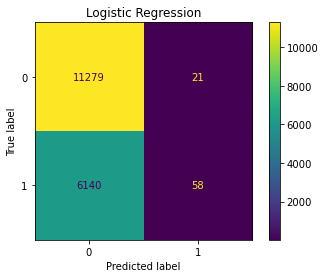

In [72]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_bow)
disp_lr.plot()
plt.title('Logistic Regression')
plt.show()

In [30]:
auc_bow = roc_auc_score(test_sentiments,lr_bow_predict)
print('auc_bow = ',auc_bow)

auc_tfidf = roc_auc_score(test_sentiments,lr_tfidf_predict)
print('auc_tfidf = ',auc_tfidf)

auc_bow =  0.5037497251468501
auc_tfidf =  0.5


In [57]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [58]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

#training data y_pred
#Predicting the model for bag of words
svm_bow_predict_train=svm.predict(cv_train_reviews)
print(svm_bow_predict_train)
#Predicting the model for tfidf features
svm_tfidf_predict_train=svm.predict(tv_train_reviews)
print(svm_tfidf_predict_train)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [59]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

#Training data accuracy rate
#Accuracy score for bag of words
svm_bow_score_train=accuracy_score(train_sentiments,svm_bow_predict_train)
print("svm_bow_score_train :",svm_bow_score_train)
#Accuracy score for tfidf features
svm_tfidf_score_train=accuracy_score(train_sentiments,svm_tfidf_predict_train)
print("svm_tfidf_score_train :",svm_tfidf_score_train)

svm_bow_score : 0.6457880900674363
svm_tfidf_score : 0.6457880900674363
svm_bow_score_train : 0.8617619047619047
svm_tfidf_score_train : 0.6576666666666666


In [60]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      6198
    Negative       0.65      1.00      0.78     11300

    accuracy                           0.65     17498
   macro avg       0.32      0.50      0.39     17498
weighted avg       0.42      0.65      0.51     17498

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      6198
    Negative       0.65      1.00      0.78     11300

    accuracy                           0.65     17498
   macro avg       0.32      0.50      0.39     17498
weighted avg       0.42      0.65      0.51     17498



[[11300     0]
 [ 6198     0]]
[[11300     0]
 [ 6198     0]]


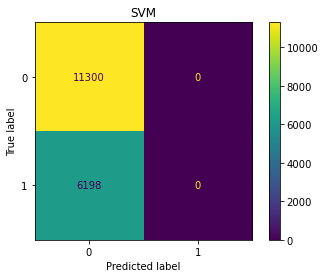

In [73]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_bow)
disp_svm.plot()
plt.title('SVM')
plt.show()

In [62]:
auc_bow = roc_auc_score(test_sentiments,svm_bow_predict)
print('auc_bow = ',auc_bow)

auc_tfidf = roc_auc_score(test_sentiments,svm_tfidf_predict)
print('auc_tfidf = ',auc_tfidf)

auc_bow =  0.5
auc_tfidf =  0.5


In [63]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [64]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

#Training data y_pred
#Predicting the model for bag of words
mnb_bow_predict_train=mnb.predict(cv_train_reviews)
print(mnb_bow_predict_train)
#Predicting the model for tfidf features
mnb_tfidf_predict_train=mnb.predict(tv_train_reviews)
print(mnb_tfidf_predict_train)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [65]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

#Training data accuracy rate
#Accuracy score for bag of words
mnb_bow_score_train=accuracy_score(train_sentiments,mnb_bow_predict_train)
print("mnb_bow_score_train :",mnb_bow_score_train)
#Accuracy score for tfidf features
mnb_tfidf_score_train=accuracy_score(train_sentiments,mnb_tfidf_predict_train)
print("mnb_tfidf_score_train :",mnb_tfidf_score_train)

mnb_bow_score : 0.6567607726597325
mnb_tfidf_score : 0.6472739741684764
mnb_bow_score_train : 0.9337857142857143
mnb_tfidf_score_train : 0.9337857142857143


In [40]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.58      0.11      0.18      6198
    Negative       0.66      0.96      0.78     11300

    accuracy                           0.66     17498
   macro avg       0.62      0.53      0.48     17498
weighted avg       0.63      0.66      0.57     17498

              precision    recall  f1-score   support

    Positive       0.86      0.01      0.01      6198
    Negative       0.65      1.00      0.79     11300

    accuracy                           0.65     17498
   macro avg       0.75      0.50      0.40     17498
weighted avg       0.72      0.65      0.51     17498



[[10825   475]
 [ 5531   667]]
[[11295     5]
 [ 6167    31]]


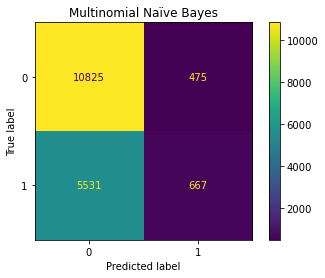

In [74]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_bow)
disp_mnb.plot()
plt.title('Multinomial Naïve Bayes')
plt.show()

In [42]:
auc_bow = roc_auc_score(test_sentiments,mnb_bow_predict)
print('auc_bow = ',auc_bow)

auc_tfidf = roc_auc_score(test_sentiments,mnb_tfidf_predict)
print('auc_tfidf = ',auc_tfidf)

auc_bow =  0.5327899807816966
auc_tfidf =  0.5022795677737895


In [68]:
!pip install WordCloud
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

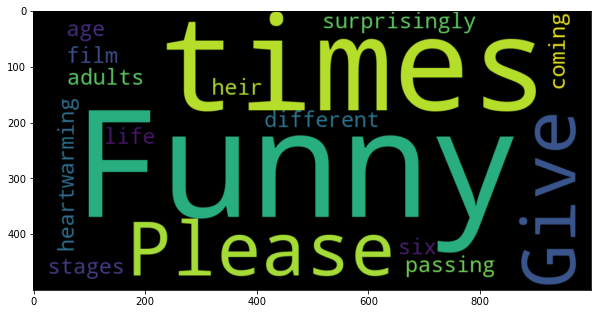

In [69]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

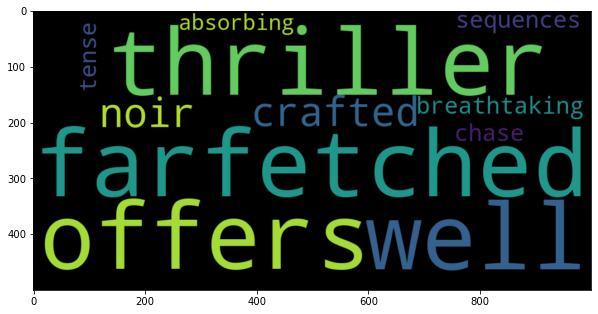

In [70]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show